In [231]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Preprocessing the Data

In [232]:
df = pd.read_csv('input.csv')
print(df)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

In [233]:
df = df.sample(frac=1)
split = int (0.8*len(df))

train_X = df[:split]['Fuel Consumption Comb (mpg)']
train_Y = df[:split]['CO2 Emissions(g/km)']

test_X = df[split:]['Fuel Consumption Comb (mpg)']
test_Y = df[split:]['CO2 Emissions(g/km)']

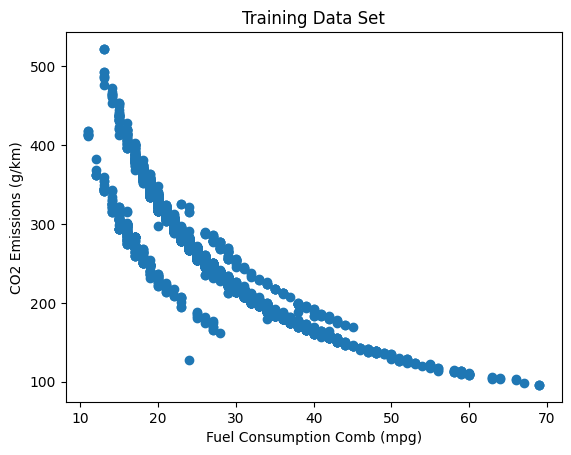

In [234]:
plt.title("Training Data Set")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.scatter(train_X, train_Y)

Training the Model

In [235]:
def linear_regression(X, Y):
    n = len(X)
    
    numerator = np.sum(X * Y) - ((np.sum(Y) * np.sum(X)) / n)
    denominator = np.sum(X ** 2) - ((np.sum(X) ** 2) / n)
    
    coef = numerator / denominator
    
    intercept = (np.sum(Y) / n) - coef * (np.sum(X) / n)
    
    return intercept, coef

Evaluate the Model

In [236]:
def mae(X, Y, func):
    total = sum(abs(func(X)-Y))
    return total / len(X)

Original Data

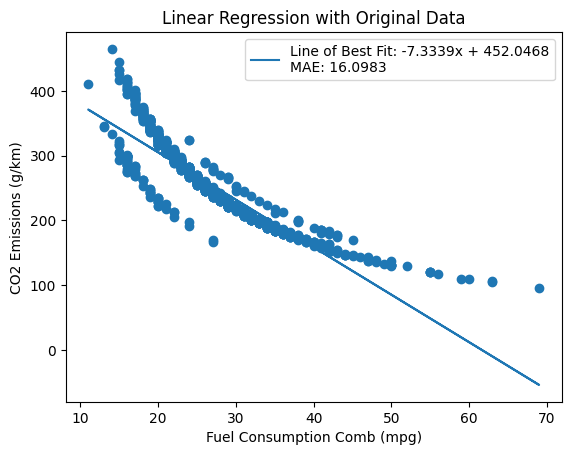

In [237]:
b_0, b_1 = linear_regression(train_X, train_Y)
f = lambda x: b_1 * x + b_0
mae_original = mae(train_X, train_Y, f)

print()

plt.title("Linear Regression with Original Data")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.plot(test_X, f(test_X), label='Line of Best Fit: ' + str(round(b_1, 4)) + 'x + ' + str(round(b_0, 4)) + '\nMAE: ' + str(round(mae_original, 4)), color='red')
plt.scatter(test_X, test_Y)

plt.legend()

Normalize Data

In [238]:
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [239]:
norm_train_X = normalize(train_X)
norm_train_Y = normalize(train_Y)

norm_test_X = normalize(test_X)
norm_test_Y = normalize(test_Y)

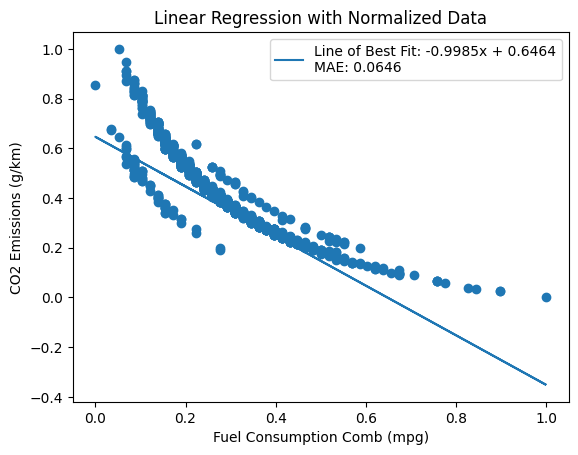

In [240]:
norm_b_0, norm_b_1 = linear_regression(norm_train_X, norm_train_Y)
f_norm = lambda x: norm_b_1 * x + norm_b_0
mae_norm = mae(norm_test_X, norm_test_Y, f_norm)

plt.title("Linear Regression with Normalized Data")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.plot(norm_test_X, f_norm(norm_test_X), label='Line of Best Fit: ' + str(round(norm_b_1, 4)) + 'x + ' + str(round(norm_b_0, 4)) + '\nMAE: ' + str(round(mae_norm, 4)), color='red')
plt.scatter(norm_test_X, norm_test_Y)

plt.legend()

Standardize Data

In [241]:
def standardize(data):
    return (data - np.mean(data)) / (np.std(data))

In [242]:
std_train_X = standardize(train_X)
std_train_Y = standardize(train_Y)

std_test_X = standardize(test_X)
std_test_Y = standardize(test_Y)

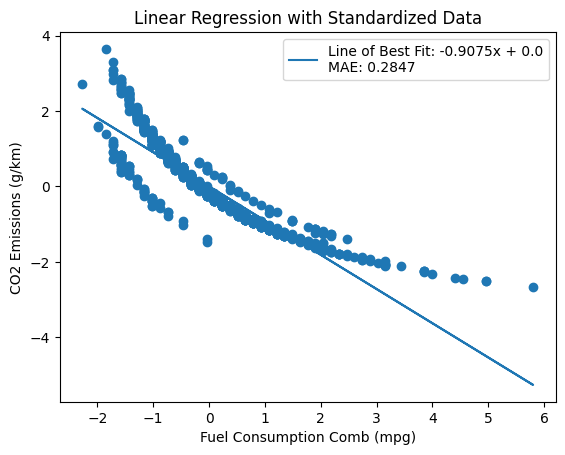

In [243]:
std_b_0, std_b_1 = linear_regression(std_train_X, std_train_Y)
f_std = lambda x: std_b_1 * x + std_b_0
mae_std = mae(std_test_X, std_test_Y, f_std)

plt.title("Linear Regression with Standardized Data")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.plot(std_test_X, f_std(std_test_X), label='Line of Best Fit: ' + str(round(std_b_1, 4)) + 'x + ' + str(round(std_b_0, 4)) + '\nMAE: ' + str(round(mae_std, 4)), color='red')
plt.scatter(std_test_X, std_test_Y)

plt.legend()

Readme

In [244]:
with open("README.md", "w", encoding='utf-8') as f:
    f.write("# CO2 Emissions Predictions using Linear Regression\n")
    f.write("## Aaryan Patel CSC590 C Format\n\n")
    
    f.write("### Original Data\n\n")
    
    f.write(f"\u03B2\u2080: {b_0}\n\n")
    f.write(f"\u03B2\u2081: {b_1}\n\n")
    f.write(f"Original MAE: {mae_original}\n\n")

    f.write("### Normalized Data\n\n")

    f.write(f"Normalized \u03B2\u2080: {norm_b_0}\n\n")
    f.write(f"Normalized \u03B2\u2081: {norm_b_1}\n\n")
    f.write(f"Normalized MAE: {mae_norm}\n\n")
    
    f.write("### Standardized Data\n\n")
    
    f.write(f"Standardized \u03B2\u2080: {std_b_0}\n\n")
    f.write(f"Standardized \u03B2\u2081: {std_b_1}\n\n")
    f.write(f"Standardized MAE: {mae_std}\n\n")

Polynomial Regression

/var/folders/d7/_cz7wjm9575_k5wyggr9gvzh0000gn/T/ipykernel_65041/881628496.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


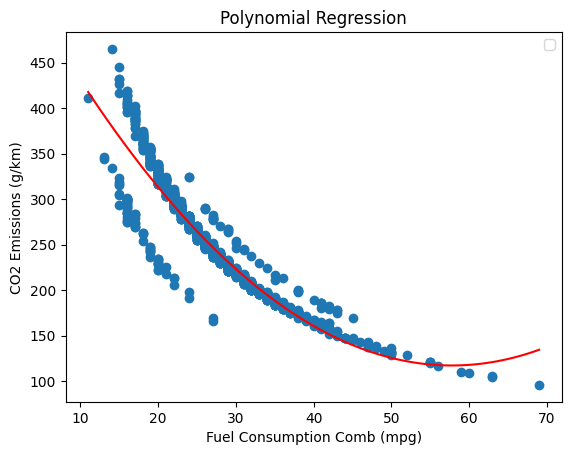

In [271]:
x_plot = np.linspace(min(test_X), max(test_X), 100)
coefficients_polynomial = np.polyfit(train_X, train_Y, 2)
f = lambda x: np.polyval(coefficients_polynomial, x) 

plt.title("Polynomial Regression")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.scatter(test_X, test_Y)

plt.plot(x_plot, f(x_plot), color='red')

plt.legend()

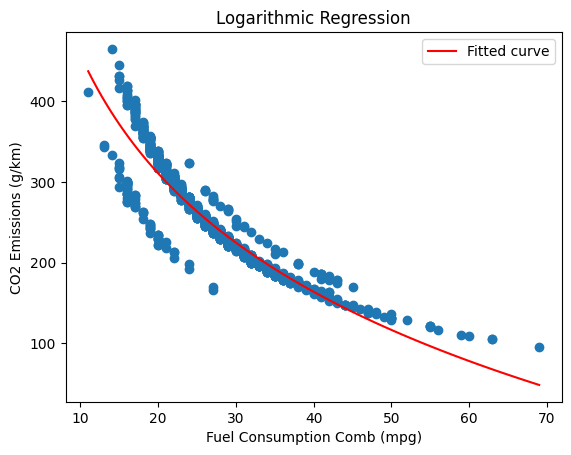

In [277]:
coefficients = np.polyfit(np.log(train_X), train_Y, 1)

a = coefficients[0]
b = coefficients[1]

x_fit = np.linspace(min(train_X), max(train_X), 100)
y_fit = a * np.log(x_fit) + b

plt.title("Logarithmic Regression")
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions (g/km)')

plt.scatter(test_X, test_Y)
plt.plot(x_fit, y_fit, color='red', label='Fitted curve')

plt.legend()